In [12]:
import pandas as pd
import talib

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num

In [13]:
def get_indicators(data):
    # Get MACD
    data["macd"], data["macd_signal"], data["macd_hist"] = talib.MACD(data['Close'])

    # Get MA10 and MA30
    data["ma10"] = talib.MA(data["Close"], timeperiod=10)
    data["ma30"] = talib.MA(data["Close"], timeperiod=30)

    # Get RSI
    data["rsi"] = talib.RSI(data["Close"])
    return data

In [105]:
def plot_chart(data, ticker, n=0, plot=False):
    """
    Saves chart in the background
    :param plot: bool: Whether to plot chart after chart been created
    :param data: : pd.DateFrame: OHLCV DataFrame
    :param ticker: str: name of the ticker
    :param n: int: last number of days
    :return: None
    """
    # To change color you can update argument "c" or "color" in the plot function bellow
    # You can find simple colors supported by matplotlib here https://matplotlib.org/stable/gallery/color/named_colors.html
    
    # controlls width of lines by default is 1. This will change all LINES on the plot.
    line_w = 2
       
    # Filter number of observations to plot
    data = data.iloc[-n:]

    # Create figure and set axes for subplots
    fig = plt.figure()
    fig.set_size_inches((20, 16))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
    ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)
    
    # Get nested list of date, open, high, low and close prices
    ohlc = []
    for idx, row in data.iterrows():
        openp, highp, lowp, closep = row[:4]
        ohlc.append([date2num(idx), openp, highp, lowp, closep])
        
    # Format x-axis ticks as dates
    ax_candle.xaxis_date()

    # Limits x-axis (removes the gap)
    ax_candle.set_xlim(xmin=ohlc[0][0], xmax=ohlc[-1][0])

    # Plot candlestick chart
    # you can set linewidth to a different number if you dont want all of them to be specific size 
    # ex: linewidth=3, this can be set separately to all plot functions bellow 
    ax_candle.plot(data.index, data["ma10"], label="MA10", linewidth=line_w, c='yellow')
    ax_candle.plot(data.index, data["ma30"], label="MA30", linewidth=line_w, c='cyan')
    
    # width controls width of the candle, colorup is a color of bull candle, colordown color of red candle
    candlestick_ohlc(ax_candle, ohlc, colorup="b", colordown="r", width=0.8)
    ax_candle.legend()

    # Plot MACD
    ax_macd.plot(data.index, data["macd"], label="macd", linewidth=line_w, c='blue')
    ax_macd.plot(data.index, data["macd_signal"], label="signal", linewidth=line_w, c='orange')    
    ax_macd.bar(data.index, data["macd_hist"] * 3, label="hist", color='slategrey')
    ax_macd.legend()

    # Plot RSI
    # Above 70% = overbought, below 30% = oversold
    ax_rsi.set_ylabel("(%)")
    ax_rsi.plot(data.index, [70] * len(data.index), label="overbought", c='red')
    ax_rsi.plot(data.index, [30] * len(data.index), label="oversold", c='green')
    ax_rsi.plot(data.index, data["rsi"], label="rsi", linewidth=line_w, c='black')
    ax_rsi.legend()

    # Show volume in millions
    ax_vol.bar(data.index, data["Volume"] / 1000000, color='coral')
    ax_vol.set_ylabel("(Million)")

    # Save the chart as PNG
    # Change path here if needed, remove "transparent=True" if needed
    # fig.savefig("charts/" + ticker + ".png", bbox_inches="tight", transparent=True)
    fig.savefig(ticker + ".png", bbox_inches="tight", transparent=True)

    if plot:
        plt.show()

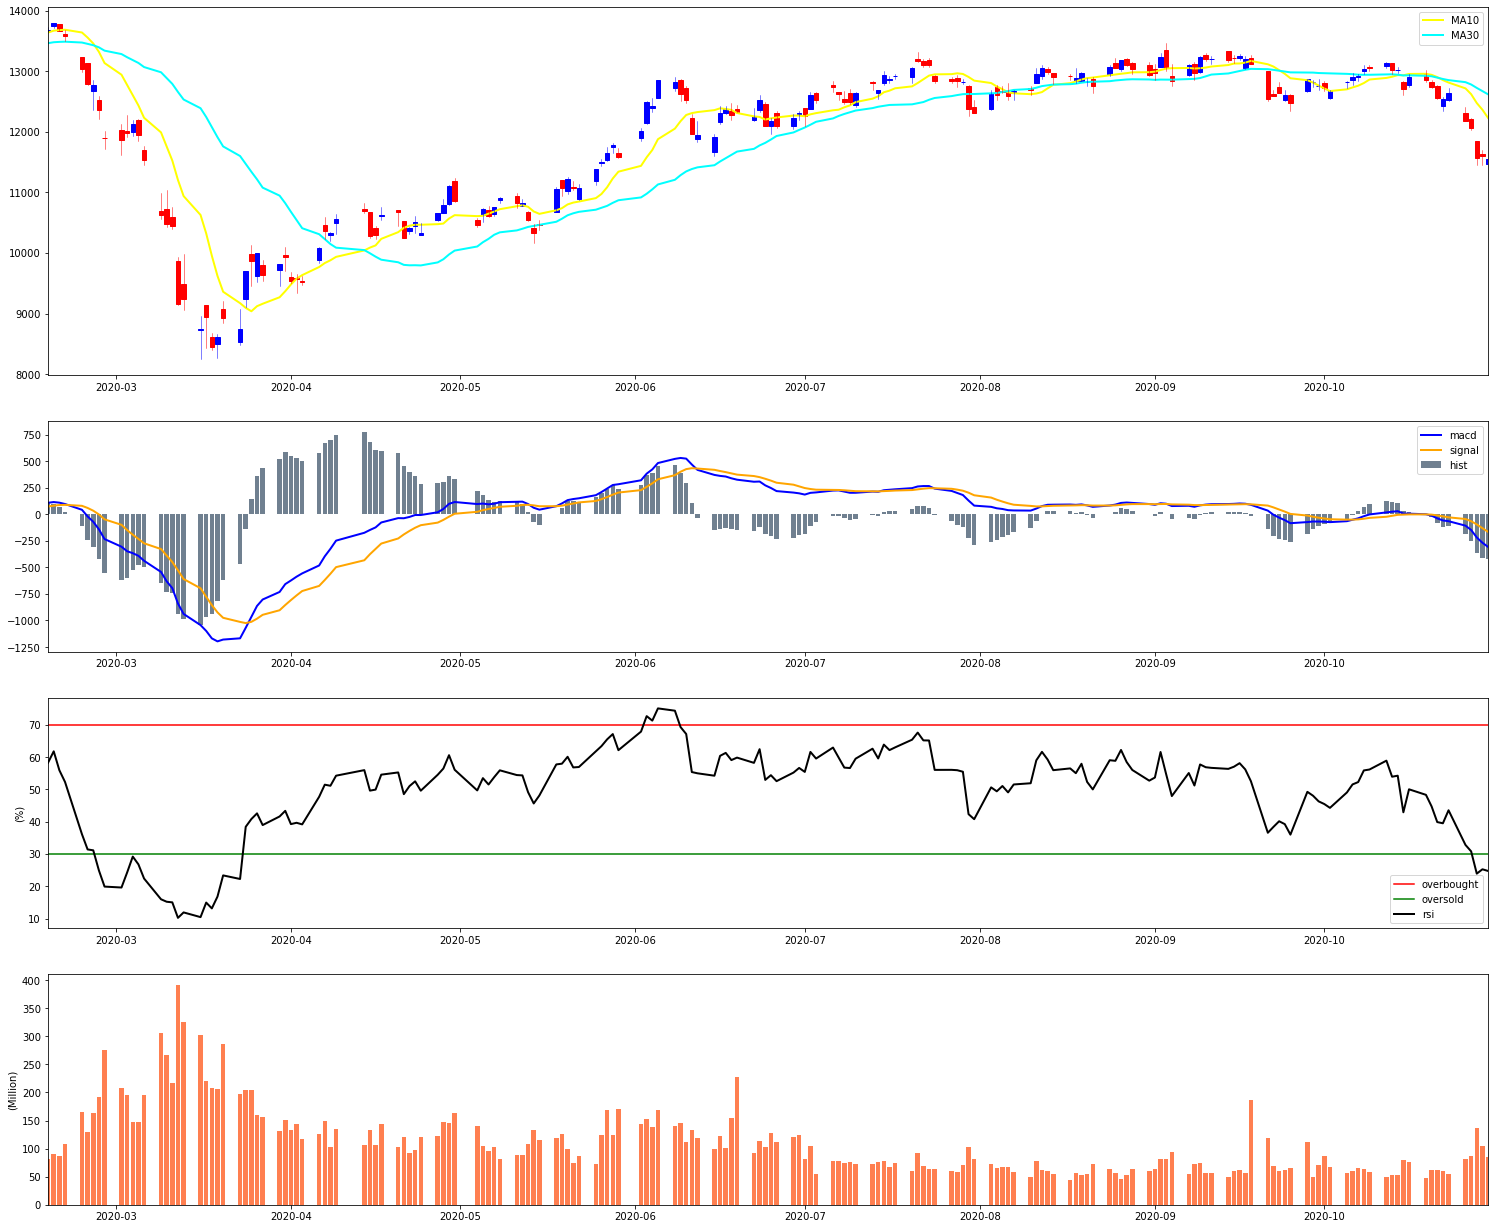

In [106]:
data = pd.read_pickle('pandas from feed after api blp request.p')
data = get_indicators(data)
plot_chart(data, 'Your Ticker', 180)

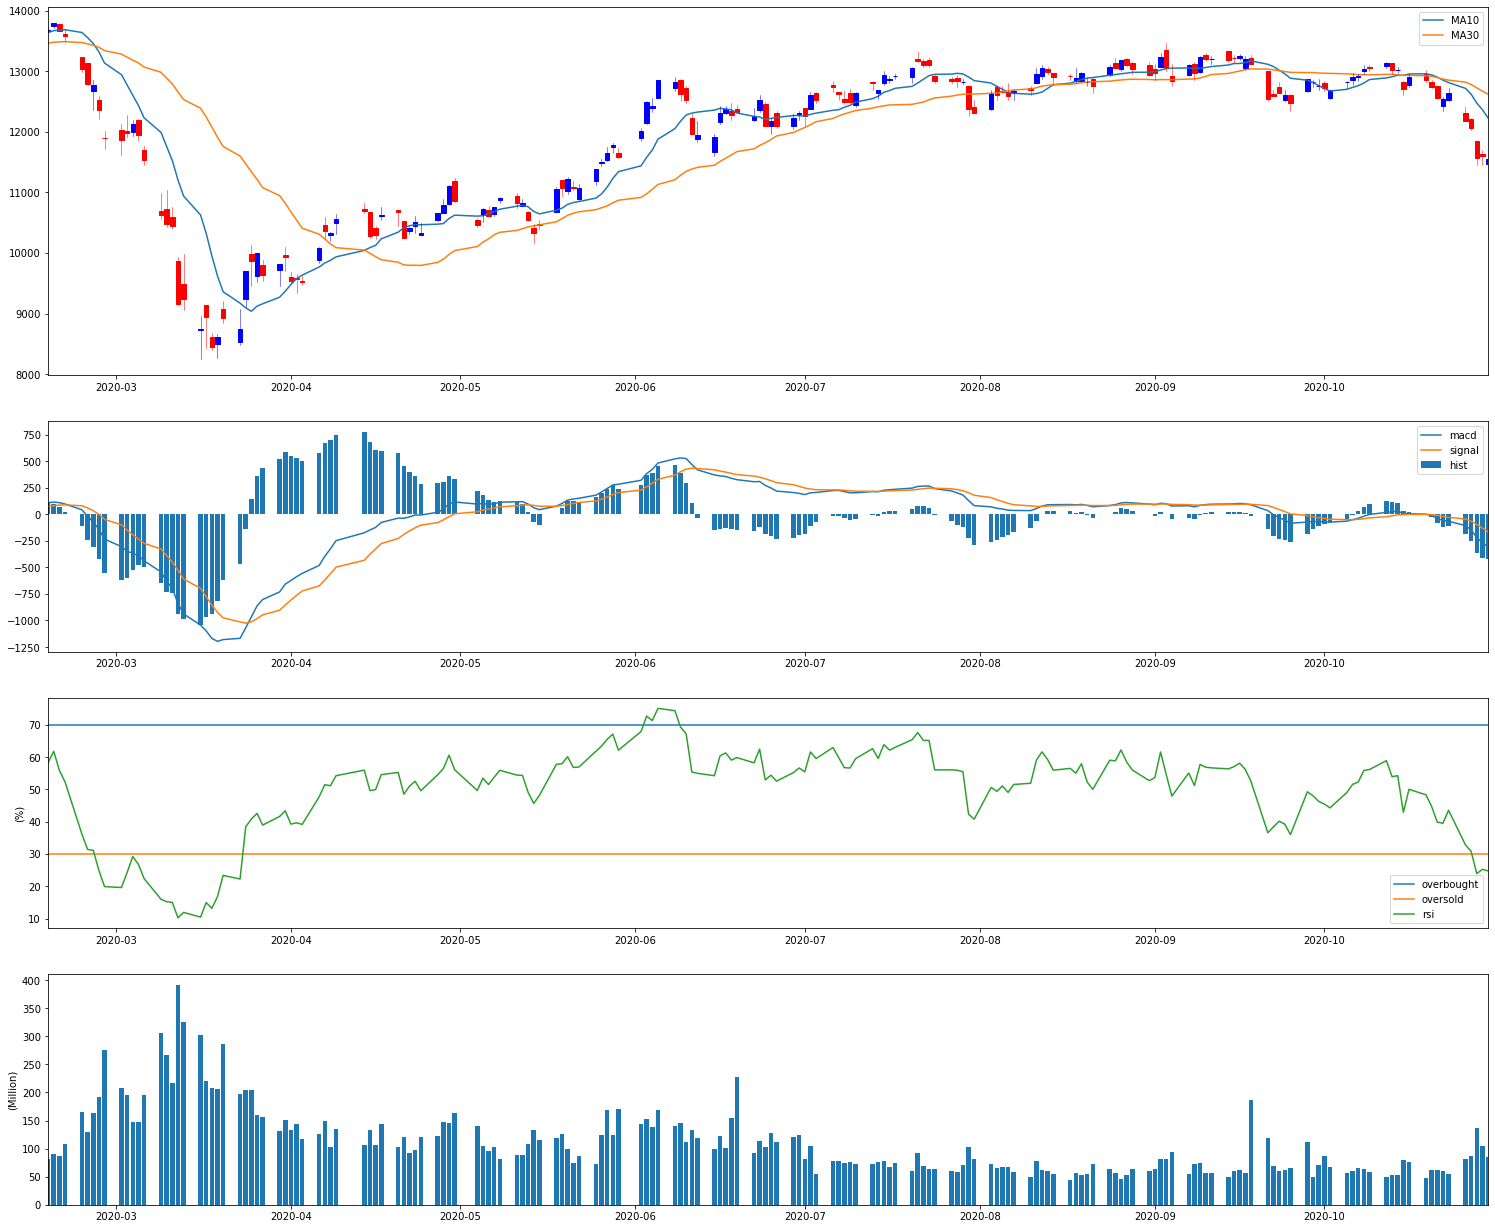

In [62]:
data = pd.read_pickle('pandas from feed after api blp request.p')
data = get_indicators(data)
plot_chart(data, 'Your Ticker', 180)

In [5]:
data = pd.read_pickle('pandas from feed after api blp request.p')
data = get_indicators(data)

In [17]:
data.tail()

,Open,High,Low,Close,Volume,macd,macd_signal,macd_hist,ma10,ma30,rsi
2020-10-26,12303.41,12404.51,12174.22,12177.18,81595546.0,-106.584690,-43.955708,-62.628983,12717.503,12819.999667,32.790437
2020-10-27,12206.42,12223.60,12034.80,12063.57,87405649.0,-147.407179,-64.646002,-82.761177,12621.961,12781.529667,30.807297
2020-10-28,11848.31,11852.02,11457.12,11560.51,137190468.0,-217.840899,-95.284981,-122.555917,12475.206,12725.034333,23.911298
2020-10-29,11631.07,11707.43,11458.56,11598.07,104958370.0,-267.545256,-129.737036,-137.808220,12364.638,12671.366000,25.256561
2020-10-30,11472.61,11614.13,11450.08,11556.48,85600358.0,-306.756188,-165.140866,-141.615321,12229.387,12619.373667,24.735069


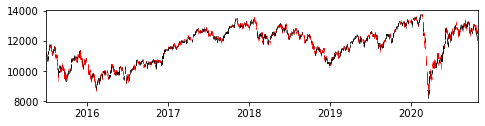

In [38]:
fig = plt.figure()
ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
ax_candle.set_xlim(xmin=ohlc[0][0], xmax=ohlc[-1][0])
ax_candle.xaxis_date()

# ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
# ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
# ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)
candlestick_ohlc(ax_candle, ohlc);
plt.show()

In [32]:
ohlc = []
for date, row in data.iterrows():
    openp, highp, lowp, closep = row[:4]
    ohlc.append([date2num(date), openp, highp, lowp, closep])
#     ohlc.append([date, openp, highp, lowp, closep])

In [35]:
ohlc[0][0]

735780.0

(1.0, 3.0)

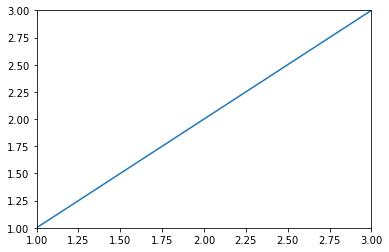

In [11]:
fig, ax = plt.subplots(1)
x = [1, 2, 3]
y = [1, 2, 3]
ax.plot(x, y)
ax.set_ylim(bottom=1, top=3)
ax.set_xlim(xmin=1, xmax=3)

In [47]:
data = pd.read_pickle('pandas from feed after api blp request.p')

In [55]:
data.head()

,Open,High,Low,Close,Volume
2015-07-01,11050.32,11283.76,10979.21,11180.50,122763931.0
2015-07-02,11191.28,11229.01,11078.59,11099.35,77177963.0
2015-07-03,11082.04,11123.18,11005.76,11058.39,65583667.0
2015-07-06,10825.06,10996.45,10823.55,10890.63,101564336.0
2015-07-07,10930.02,10946.87,10663.99,10676.78,107402610.0


In [58]:
data.loc['2015-07-01':]

,Open,High,Low,Close,Volume
2015-07-01,11050.32,11283.76,10979.21,11180.50,122763931.0
2015-07-02,11191.28,11229.01,11078.59,11099.35,77177963.0
2015-07-03,11082.04,11123.18,11005.76,11058.39,65583667.0
2015-07-06,10825.06,10996.45,10823.55,10890.63,101564336.0
2015-07-07,10930.02,10946.87,10663.99,10676.78,107402610.0
...,...,...,...,...,...
2020-10-26,12303.41,12404.51,12174.22,12177.18,81595546.0
2020-10-27,12206.42,12223.60,12034.80,12063.57,87405649.0
2020-10-28,11848.31,11852.02,11457.12,11560.51,137190468.0
2020-10-29,11631.07,11707.43,11458.56,11598.07,104958370.0


In [54]:
datetime('2015-07-01')

TypeError: 'module' object is not callable